In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.style.use('seaborn-v0_8')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc


In [2]:
wine_df = pd.read_csv('winequality-red.csv', sep=',')
wine_df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## EDA



In [3]:
wine_df.shape

(1599, 12)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

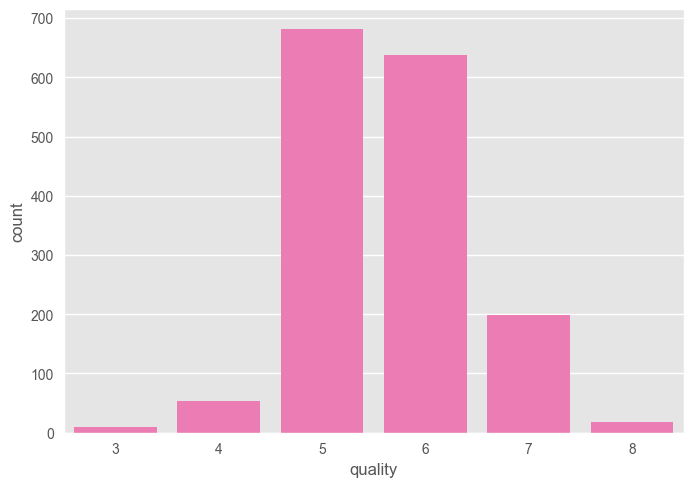

In [8]:
style.use('ggplot')
sns.countplot(x=wine_df['quality'],color='hotpink')

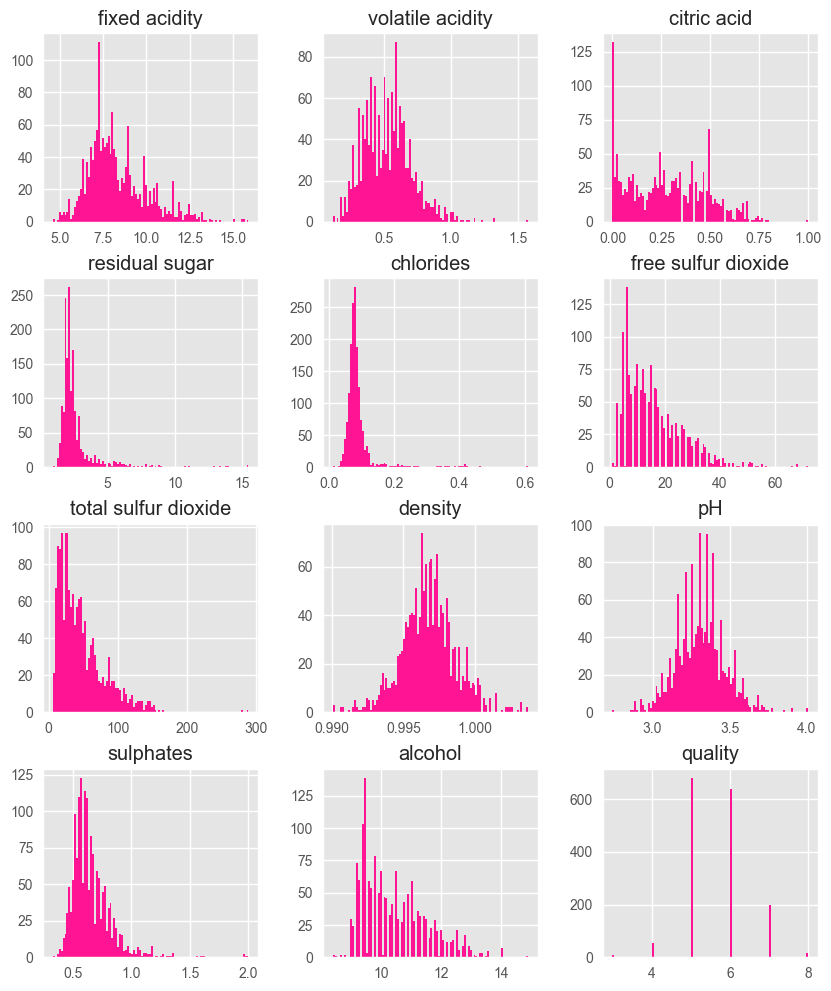

In [9]:
wine_df.hist(bins=100, figsize=(10,12),color='deeppink')
plt.show()

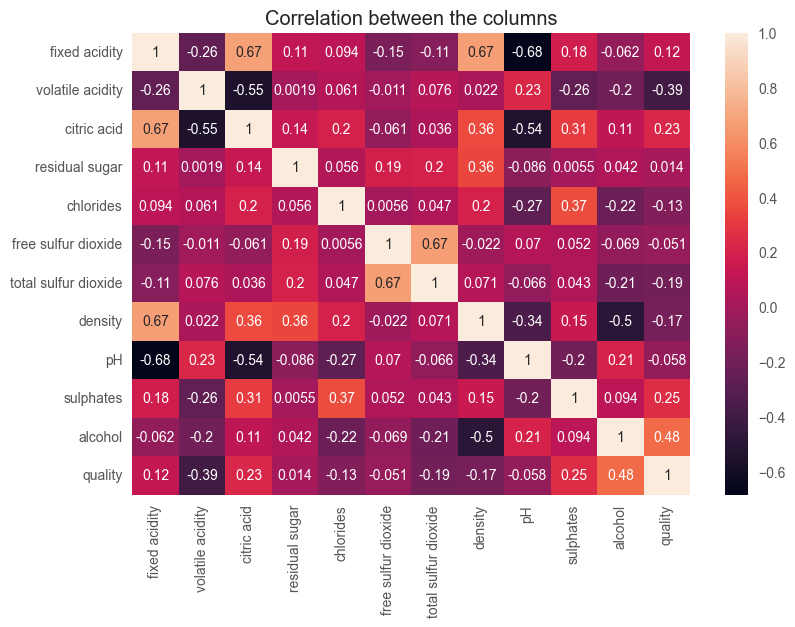

In [10]:
plt.figure(figsize=(9,6))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [11]:
wine_df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='alcohol'>

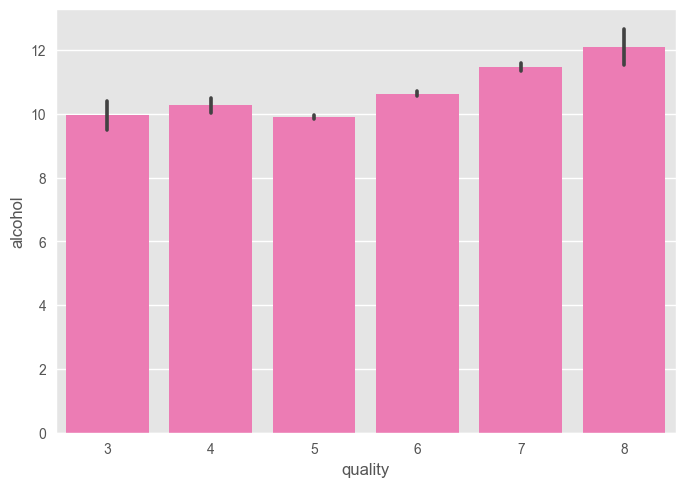

In [12]:
sns.barplot(x= wine_df['quality'], y= wine_df['alcohol'], color='hotpink')

## Data Processing


In [13]:
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

# convert wine quality into a binary classification — wines ≥7 become 1 (good) and the rest 0 (not good)
#it simplify task from multi class prediction to a clear good vs. bad classification problem.


In [14]:
wine_df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [15]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

# X = all input features 
# drop quality- its target/output to predict.
# y = the target label = the wine’s quality (0 not good, 1 good)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

# split data- 70perc is training 30 perc is testing
# andom_state=42 - same random split every time you run it.

In [17]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [18]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


## Model Training 

### logistic regression model 

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 88.75%


In [20]:
print(classification_report(y_test, logreg_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       415
           1       0.68      0.32      0.44        65

    accuracy                           0.89       480
   macro avg       0.79      0.65      0.69       480
weighted avg       0.87      0.89      0.87       480



True Negative :  405
False Negative :  44
True Positive :  21
False Positive :  10


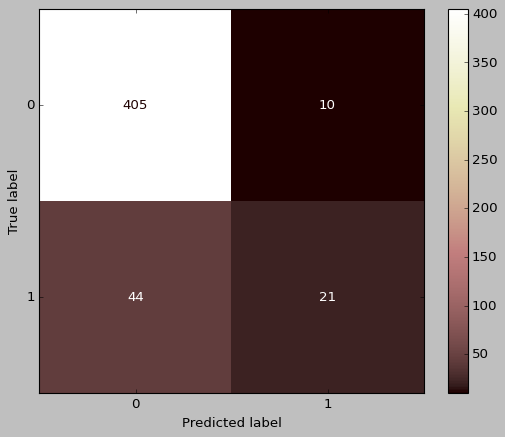

In [21]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot(cmap='pink')
print("True Negative : ", cm[0][0])
print("False Negative : ", cm[1][0])
print("True Positive : ", cm[1][1])
print("False Positive : ", cm[0][1])

### Decision tree

In [22]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 88.75%


In [23]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       415
           1       0.58      0.58      0.58        65

    accuracy                           0.89       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.89      0.89      0.89       480



TN:  388
FN:  27
TP:  38
FP:  27


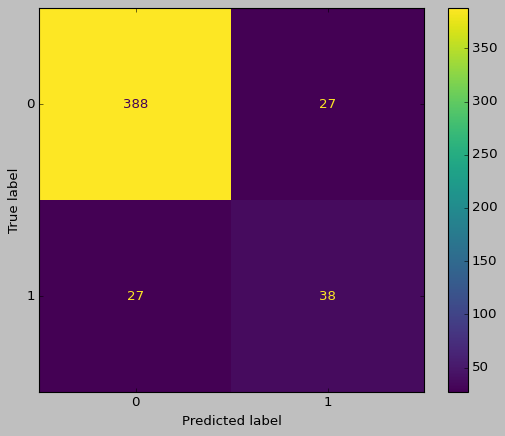

In [24]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### Random Forest 

In [25]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 93.12%


In [26]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       415
           1       0.90      0.55      0.69        65

    accuracy                           0.93       480
   macro avg       0.92      0.77      0.82       480
weighted avg       0.93      0.93      0.92       480



TN:  411
FN:  29
TP:  36
FP:  4


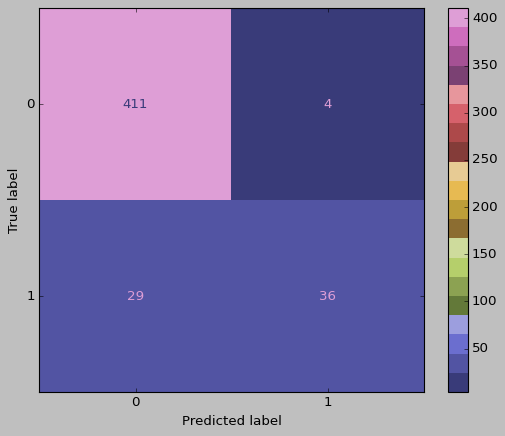

In [27]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot(cmap='tab20b')
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

### XGBoost Classifier

In [28]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train) 
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Test accuracy: {:.2f}%".format(xgb_acc * 100))



XGBoost Test accuracy: 93.12%


In [29]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       415
           1       0.86      0.58      0.70        65

    accuracy                           0.93       480
   macro avg       0.90      0.79      0.83       480
weighted avg       0.93      0.93      0.93       480



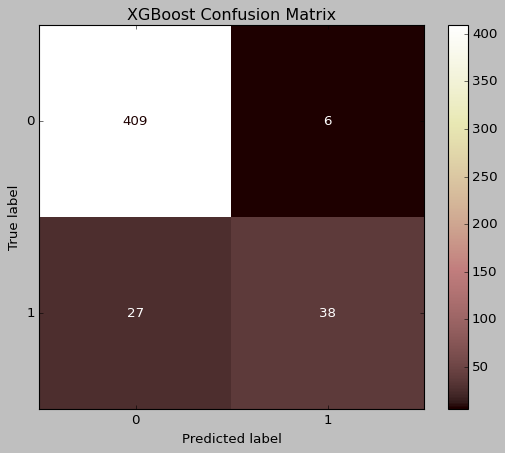

TN:  409
FN:  27
TP:  38
FP:  6


In [30]:
style.use('classic')
cm_xgb = confusion_matrix(y_test, xgb_pred, labels=xgb.classes_)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix= cm_xgb, display_labels=xgb.classes_)
disp_xgb.plot(cmap='pink')
plt.title('XGBoost Confusion Matrix')
plt.show()

print("TN: ", cm_xgb[0][0])
print("FN: ", cm_xgb[1][0])
print("TP: ", cm_xgb[1][1])
print("FP: ", cm_xgb[0][1])

## Model Optimization

### Tuning of Random Forest Classifier


In [31]:
rf_param_grid = {
    'n_estimators': [150, 250], 
    'max_depth': [10, 20]        
}

In [32]:
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='f1',
    cv=5,
    verbose=0,
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 20], 'n_estimators': [150, 250]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,250


In [33]:
best_rf = rf_grid_search.best_estimator_
rf_tuned_pred = best_rf.predict(X_test)

print(" Tuned Random Forest Results")
print(f"Best RF Params: {rf_grid_search.best_params_}")
print(f"Tuned RF F1-Score: {f1_score(y_test, rf_tuned_pred):.4f}")
print(f"Tuned RF Accuracy: {accuracy_score(y_test, rf_tuned_pred):.4f}")

 Tuned Random Forest Results
Best RF Params: {'max_depth': 20, 'n_estimators': 250}
Tuned RF F1-Score: 0.6731
Tuned RF Accuracy: 0.9292


### Tuning XGboost Classifier

In [34]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],      
    'learning_rate': [0.1]    
}


In [35]:
xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=5,
    verbose=0,
    n_jobs=-1
)

In [36]:
xgb_grid_search.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1], 'max_depth': [3, 6], 'n_estimators': [100, 200]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [37]:
best_xgb = xgb_grid_search.best_estimator_
xgb_tuned_pred = best_xgb.predict(X_test)

In [38]:
print("Tuned XGBoost Results ")
print(f"Best XGB Params: {xgb_grid_search.best_params_}")
print(f"Tuned XGB F1-Score: {f1_score(y_test, xgb_tuned_pred):.4f}")
print(f"Tuned XGB Accuracy: {accuracy_score(y_test, xgb_tuned_pred):.4f}")

Tuned XGBoost Results 
Best XGB Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Tuned XGB F1-Score: 0.7193
Tuned XGB Accuracy: 0.9333


## Final Model Comparision

In [39]:
# 1. Logistic Regression (Initial)
logreg_f1 = f1_score(y_test, logreg_pred, pos_label=1)
logreg_acc = accuracy_score(y_test, logreg_pred)

# 2. Decision Tree (Initial)
dtree_f1 = f1_score(y_test, dtree_pred, pos_label=1)
dtree_acc = accuracy_score(y_test, dtree_pred)

# 3. Random Forest (TUNED Best Estimator)
rf_tuned_f1 = f1_score(y_test, rf_tuned_pred, pos_label=1)
rf_tuned_acc = accuracy_score(y_test, rf_tuned_pred)

# 4. XGBoost (TUNED Best Estimator)
xgb_tuned_f1 = f1_score(y_test, xgb_tuned_pred, pos_label=1)
xgb_tuned_acc = accuracy_score(y_test, xgb_tuned_pred)

In [40]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest (Tuned)', 'XGBoost (Tuned)'],
    'Accuracy': [logreg_acc, dtree_acc, rf_tuned_acc, xgb_tuned_acc],
    'F1 Score (Good Wine)': [logreg_f1, dtree_f1, rf_tuned_f1, xgb_tuned_f1]
}


In [41]:
results_df = pd.DataFrame(data)
results_df = results_df.set_index('Model').sort_values(by='F1 Score (Good Wine)', ascending=False)

print("\nFinal Model Performance Summary ")
print("F1-Score is the primary metric due to the class imbalance (few high quality wines).\n")
display(results_df.round(4))


Final Model Performance Summary 
F1-Score is the primary metric due to the class imbalance (few high quality wines).



,Accuracy,F1 Score (Good Wine)
Model,,
XGBoost (Tuned),0.9333,0.7193
Random Forest (Tuned),0.9292,0.6731
Decision Tree,0.8875,0.5846
Logistic Regression,0.8875,0.4375


In [42]:
best_model_name = results_df.index[0]
print(f"\nConclusion: The best performing model, based on the F1-Score, is the {best_model_name}.")
print("This model will be the basis for our Feature Importance analysis.")


Conclusion: The best performing model, based on the F1-Score, is the XGBoost (Tuned).
This model will be the basis for our Feature Importance analysis.


## Feature Importance Analysis

In [43]:
# Use the best estimator from the XGBoost tuning cell
best_model = best_xgb 

# Extract importances
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [44]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Top 5 Feature Importances ")
display(feature_importance_df.head(5).round(4))

Top 5 Feature Importances 


,Feature,Importance
10,alcohol,0.2814
1,volatile acidity,0.1227
9,sulphates,0.0968
6,total sulfur dioxide,0.0854
0,fixed acidity,0.0677


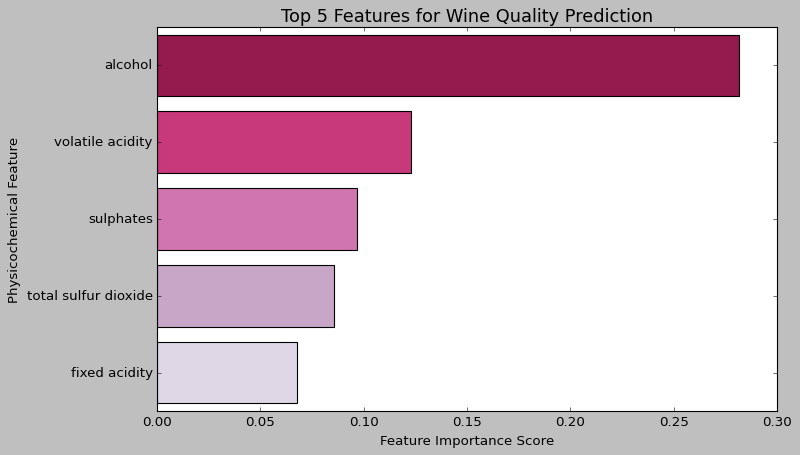

In [45]:
# PLOT THE TOP 5 FEATURES
plt.figure(figsize=(10, 6))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5), palette='PuRd_r') 
plt.title('Top 5 Features for Wine Quality Prediction', fontsize=16)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Physicochemical Feature', fontsize=12)
plt.show()


# using Random Forest Classifier (rforest) for calculating how much each input feature contributed to the final prediction
importances = rforest.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


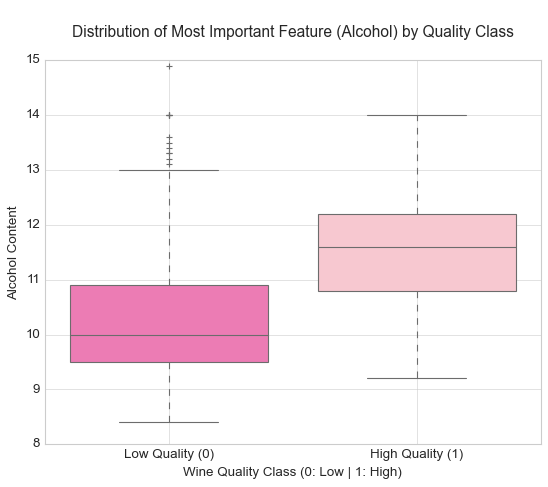

In [46]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='quality',
    y='alcohol',
    data=wine_df,
    palette=['hotpink', 'pink'] 
)
plt.title('\nDistribution of Most Important Feature (Alcohol) by Quality Class\n', fontsize=14)
plt.xlabel('Wine Quality Class (0: Low | 1: High)', fontsize=12)
plt.ylabel('Alcohol Content', fontsize=12)

plt.xticks([0, 1], ['Low Quality (0)', 'High Quality (1)'])
plt.grid(axis='x') 
plt.show()


This box plot visually explains *why* the model relies on Alcohol content.
The higher concentration in Class 1 (High Quality) is the data signal the model uses.
In the presentation, link this to how high values of a molecular descriptor (like HOMO) push the prediction towards high Carrier Mobility.

## ROC Curve and AUC Analysis


In [47]:
# probability score 
logreg_probs = logreg.predict_proba(X_test)[:, 1]
dtree_probs = dtree.predict_proba(X_test)[:, 1]
rforest_tuned_probs = best_rf.predict_proba(X_test)[:, 1] 
xgb_tuned_probs = best_xgb.predict_proba(X_test)[:, 1]   

In [48]:
# Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, logreg_probs)
auc_lr = auc(fpr_lr, tpr_lr)

# Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dtree_probs)
auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest (Tuned)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rforest_tuned_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost (Tuned)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_tuned_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

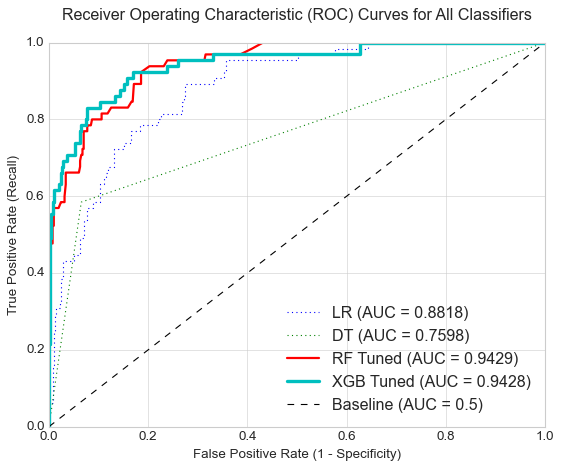

In [49]:
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC = {auc_lr:.4f})', linestyle=':')
plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC = {auc_dt:.4f})', linestyle=':')


plt.plot(fpr_rf, tpr_rf, label=f'RF Tuned (AUC = {auc_rf:.4f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB Tuned (AUC = {auc_xgb:.4f})', linewidth=3)

# baseline (random chance)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.5)')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curves for All Classifiers\n')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [50]:
print("\nAUC Scores Summary")
print(f"Logistic Regression AUC: {auc_lr:.4f}")
print(f"Decision Tree AUC:       {auc_dt:.4f}")
print(f"Random Forest (Tuned) AUC: {auc_rf:.4f}")
print(f"XGBoost (Tuned) AUC:     {auc_xgb:.4f}")


AUC Scores Summary
Logistic Regression AUC: 0.8818
Decision Tree AUC:       0.7598
Random Forest (Tuned) AUC: 0.9429
XGBoost (Tuned) AUC:     0.9428


#### Conclusion 
1. Tuned Random Forest and XGBoost models achieved the highest AUC scores, showing excellent classification performance.
2. Logistic Regression delivered good results, but with lower AUC than ensemble models.
3. Decision Tree had the lowest AUC, indicating less reliable predictions compared to other models.
4. ROC curves confirm that ensemble classifiers consistently distinguish between high and low quality wines.
5. Advanced models provide trustworthy and robust wine quality predictions from physicochemical data.
6. Using AUC as the metric, Random Forest and XGBoost are the best choices for binary wine quality classification